In [1]:
import nbimporter
%run readin.ipynb
ms3data = readin("proteinGroups_MS3_simplified.txt")

In [2]:
samples = ms3data.iloc[:,[0,1,2,3,4,5,6,8]].values.flatten()
samples_reps= {
    "Cell Line 1":ms3data.iloc[:,[0,1,2]].values.flatten(),
    "Cell Line 2":ms3data.iloc[:,[3,4,5]].values.flatten(),

    "Cell Line 3":ms3data.iloc[:,[6,8]].values.flatten()
}  
print ("Non-zeros in samples: ", len(skipZero(samples)))
print (len(skipZero(samples))/len(samples)*100,'%')
print ("Percent of zeros: ",(1 - len(skipZero(samples))/len(samples)))
samples= skipZero(np.sort(samples))

for i in samples_reps:
    print ("Zeros in {0}: ".format(i), (1-len(skipZero(samples_reps[i]))/len(samples_reps[i]))*100,'%')
    


Non-zeros in samples:  8140
70.85654596100278 %
Percent of zeros:  0.2914345403899722
Zeros in Cell Line 1:  30.57103064066853 %
Zeros in Cell Line 2:  28.597957288765087 %
Zeros in Cell Line 3:  27.820334261838443 %


In [3]:
neg_cont = ms3data.iloc[:,7]

print ("Non-zeros in Neg. Control: ", len(skipZero(neg_cont)))
print (len(skipZero(neg_cont))/len(neg_cont))

Non-zeros in Neg. Control:  370
0.2576601671309192


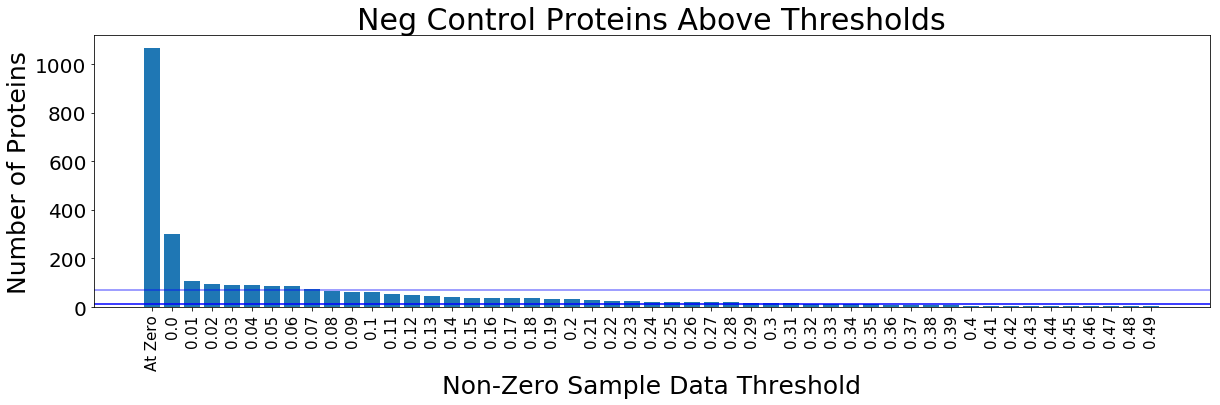

In [4]:
def above(per, neg_cont, samples):
    threshold = float(samples[math.ceil(float(len(samples))*per)])
    #print (per, threshold)
    count = len([x for x in neg_cont if x > threshold])
    #print ("Above {0}%".format(per*100.0), count, count/len(neg_cont))
    return count

blanks_above = {'At Zero': (len(neg_cont)-len(skipZero(neg_cont)))}
for i in range(0,50):
    p = (float(i)/100.0)
    blanks_above[p] = above(p, neg_cont, samples)


plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(20,5))
plt.bar(range(len(blanks_above)), list(blanks_above.values()), align='center')
plt.xticks(range(len(blanks_above)), list(blanks_above.keys()), rotation="vertical")


plt.axhline(y=(len(neg_cont)/100), color='b', linestyle='-')
plt.axhline(y=(len(neg_cont)/20), color='b', linestyle='-',alpha=.5)

plt.xlabel("Non-Zero Sample Data Threshold")
plt.ylabel("Number of Proteins")

plt.title("Neg Control Proteins Above Thresholds")

fig.savefig('figures/NegAboveThresholds.png', dpi=300)
plt.show()

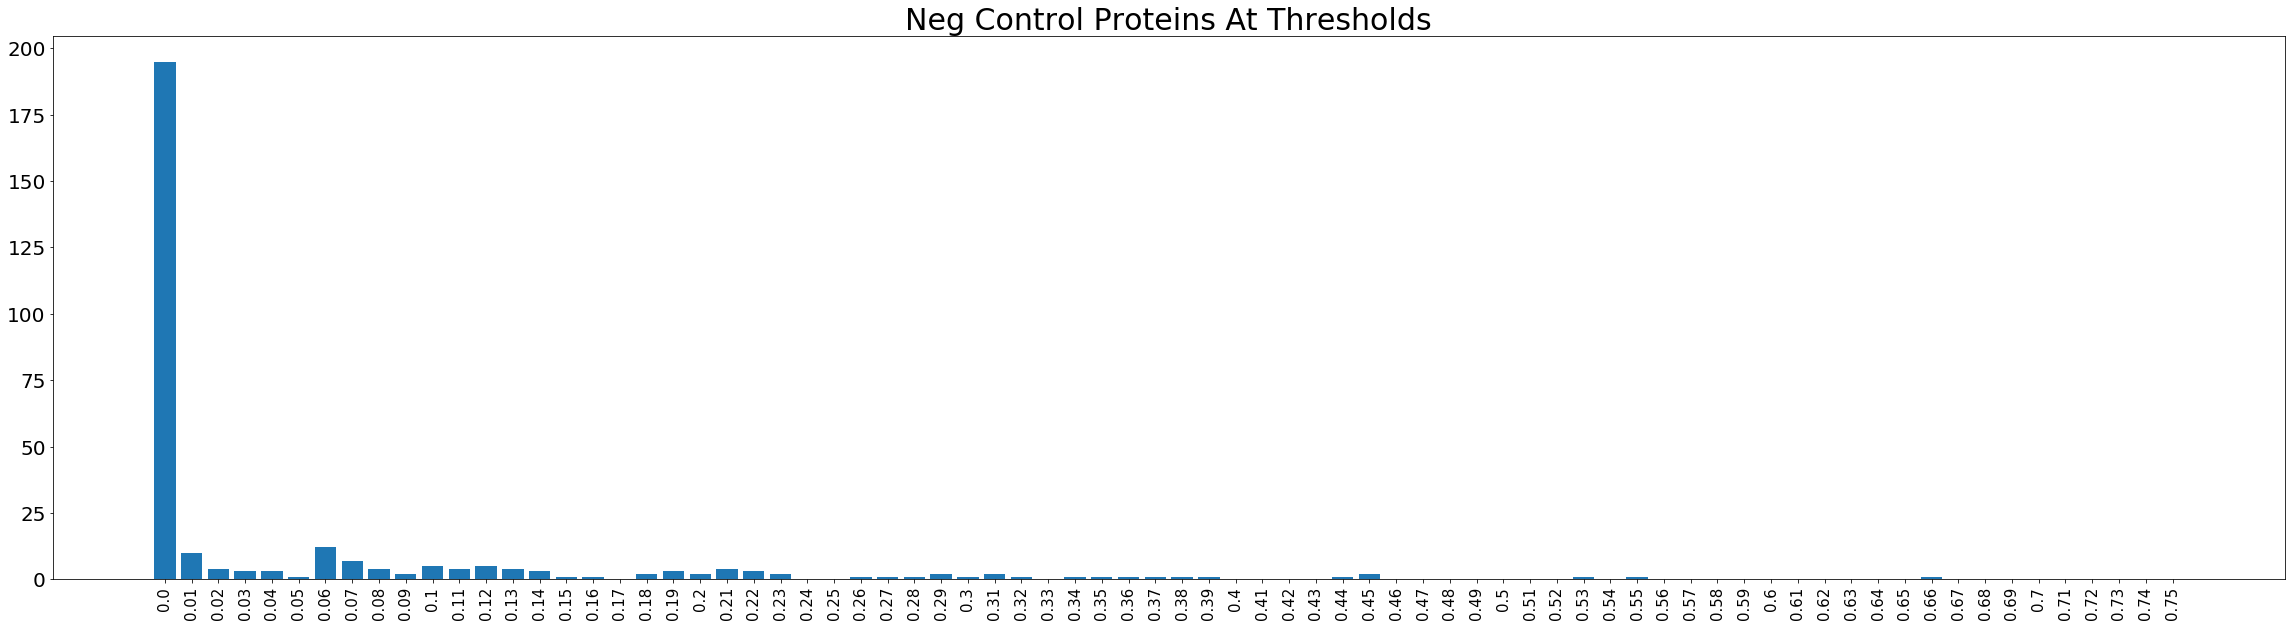

In [5]:
blanks_above = {}
neg_higher = [x for x in neg_cont if x > 0]

for i in range(0,76):
    p = 75-i
    p = (float(p)/100.0)
    threshold = float(samples[math.ceil(float(len(samples))*p)])
    count = len([x for x in neg_higher if x > threshold])
    blanks_above[p] = count
    new_higher = [x for x in neg_higher if x < threshold]
    neg_higher = new_higher

blanks_above = dict(sorted(blanks_above.items()))

fig = plt.figure(figsize=(40,10))
plt.bar(range(len(blanks_above)), list(blanks_above.values()), align='center')
plt.xticks(range(len(blanks_above)), list(blanks_above.keys()), rotation="vertical")

plt.title("Neg Control Proteins At Thresholds")
#fig.savefig('figures/NegAtThresholds.png', dpi=300)
plt.show()

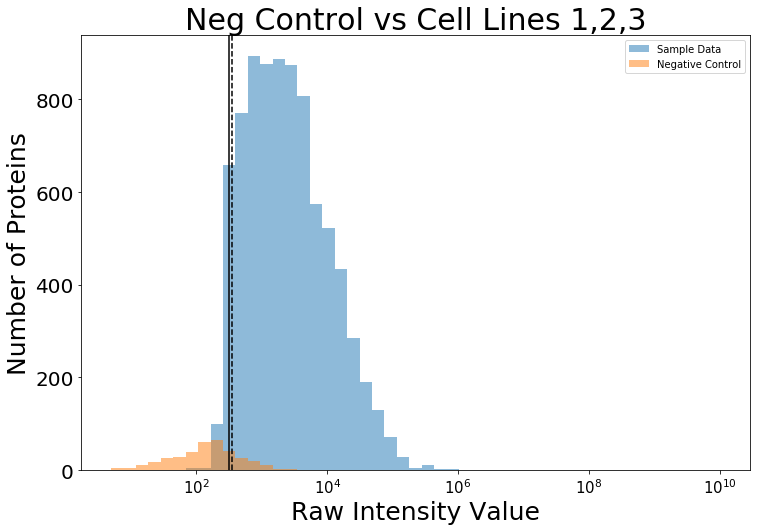

94% of neg cont is below first line
95% of sample data is above the first line

95% of neg cont is below dashed line
93% of sample data is above the dashed line


In [6]:
fig = plt.figure(figsize=(12,8))
plt.xscale('log')
plt.hist(samples, alpha=.5,bins=np.logspace(np.log10(5), 10), label="Sample Data")
plt.hist(neg_cont, alpha = .5, bins=np.logspace(np.log10(5), 10), label="Negative Control")

plt.legend(loc='upper right')

plt.title("Neg Control vs Cell Lines 1,2,3")
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.05)]), linestyle='-', color="black")
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.07)]), linestyle='dashed', color="black")

plt.xlabel("Raw Intensity Value")
plt.ylabel("Number of Proteins")

fig.savefig('figures/CellLines123.png', dpi=300)
plt.show()

print ("94% of neg cont is below first line\n95% of sample data is above the first line")
print ("\n95% of neg cont is below dashed line\n93% of sample data is above the dashed line")

In [7]:
negCont = ms3data.iloc[:,7].values
approxZero = mean(negCont)
stdevBlank = stdev(negCont)
min_threshold = (stdevBlank+approxZero)
print ("Mean of Negative Control: ", approxZero,'\nStdev:',stdevBlank)
print ("Threshold at",(min_threshold))
print ("Log Value of ", math.log(min_threshold))

Mean of Negative Control:  65.40237715877437 
Stdev: 224.63347276660156
Threshold at 290.03584992537594
Log Value of  5.670004535772475


Non-zeros in boost:  1238
86.2116991643454 %


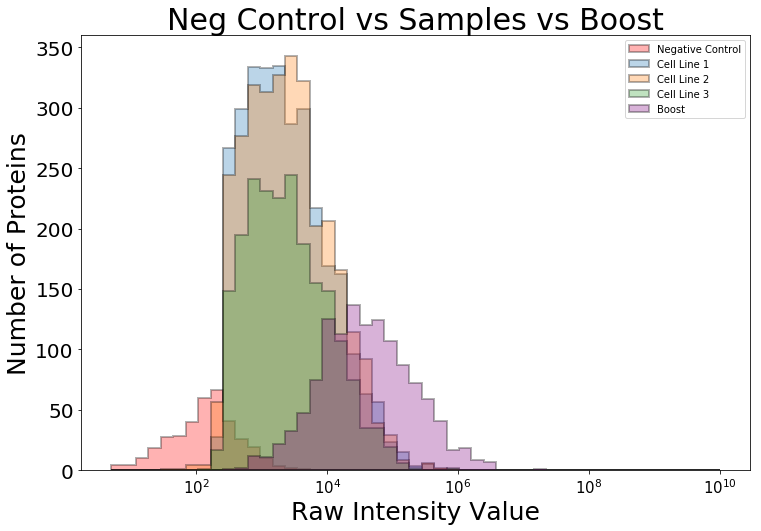

In [8]:
boost = ms3data.iloc[:,9]

print ("Non-zeros in boost: ", len(skipZero(boost)))
print (len(skipZero(boost))/len(boost)*100,'%')

fig = plt.figure(figsize=(12,8))
plt.xscale('log')

kwargs = dict(histtype='stepfilled', alpha = .3, bins=np.logspace(np.log10(5), 10), edgecolor='black', linewidth=2)

plt.hist(neg_cont, color = 'red',label="Negative Control", **kwargs)
for i in samples_reps:
    plt.hist(samples_reps[i], label=i, **kwargs)
plt.hist(boost, color='purple', label="Boost", **kwargs)

plt.legend(loc='upper right')

plt.title("Neg Control vs Samples vs Boost")
#plt.axvline(x= min_threshold, linestyle='-', color="black")
#plt.axvline(x= float(samples[math.ceil(float(len(samples))*.05)]), linestyle='dotted', color="black", alpha = .5)

plt.xlabel("Raw Intensity Value")
plt.ylabel("Number of Proteins")

fig.savefig('figures/NegSampBoost.png', dpi=300)
plt.show()



In [9]:
float(samples[math.ceil(float(len(samples))*.05)])

316.01

In [10]:
def above_v(alist,list_name, min_threshold):
    p = (len([x for x in alist if x > min_threshold])/len(alist)*100)
    print ('{0:.2f} % of {1} falls above the threshold'.format(p, list_name))
    alist = skipZero(alist)
    p = (len([x for x in alist if x > min_threshold])/len(alist)*100)
    print ('{0:.2f} % of {1} without zeros falls above the threshold'.format(p, list_name))
    print()

above_v(neg_cont, "Negative Control", min_threshold)
for i in samples_reps:
    above_v(samples_reps[i], i, min_threshold)
above_v(boost, "Boost", min_threshold)


6.41 % of Negative Control falls above the threshold
24.86 % of Negative Control without zeros falls above the threshold

67.62 % of Cell Line 1 falls above the threshold
97.39 % of Cell Line 1 without zeros falls above the threshold

68.20 % of Cell Line 2 falls above the threshold
95.51 % of Cell Line 2 without zeros falls above the threshold

69.95 % of Cell Line 3 falls above the threshold
96.91 % of Cell Line 3 without zeros falls above the threshold

86.21 % of Boost falls above the threshold
100.00 % of Boost without zeros falls above the threshold



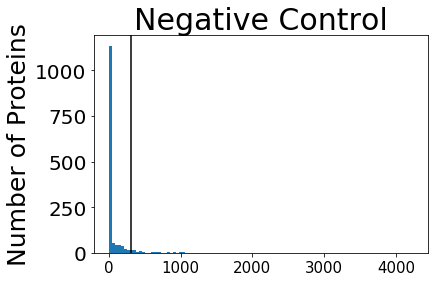

In [11]:
fig = plt.figure(figsize=(6,4))
plt.hist(neg_cont, bins = 100)
#sns.rugplot(neg_cont, color="black")
plt.title("Negative Control")
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.05)]), linestyle='-', color="black")
plt.ylabel("Number of Proteins")

fig.savefig('figures/NegControl.png', dpi=300)
plt.show()


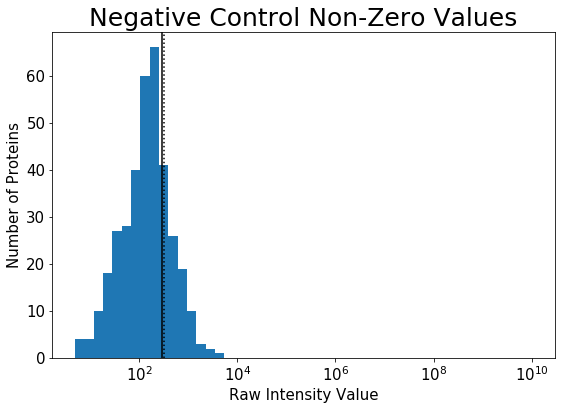

In [12]:
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 

fig = plt.figure(figsize=(9,6))
plt.xscale('log')
plt.hist(neg_cont, bins=np.logspace(np.log10(5), 10))
#sns.rugplot(neg_cont, color="black")
plt.title("Negative Control Non-Zero Values")
plt.axvline(x= min_threshold, linestyle='-', color="black")
plt.axvline(x= float(samples[math.ceil(float(len(samples))*.05)]), linestyle='dotted', color="black")
plt.xlabel("Raw Intensity Value")
plt.ylabel("Number of Proteins")

fig.savefig('figures/NegControlNonZero.png', dpi=300)
plt.show()
